# Naive Bayes

In [3]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np 

df = pd.read_csv("../data/spam.csv", encoding="latin-1")
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [10]:
df_no_nan = df.dropna(axis=1)
df_no_nan.columns = ["class", "content"]
df_no_nan.head()

,class,content
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


<Axes: xlabel='class', ylabel='count'>

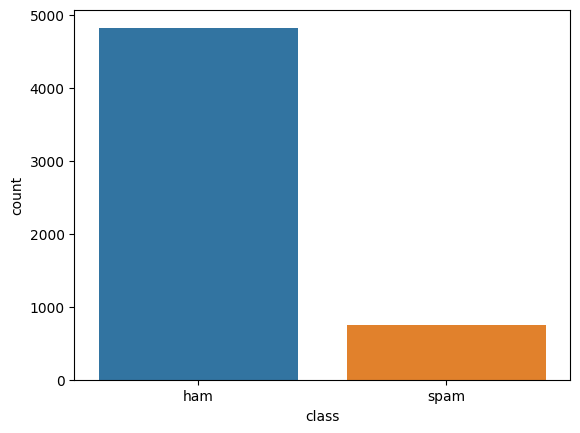

In [11]:
sns.countplot(data = df_no_nan, x = "class")

In [14]:
df = pd.get_dummies(df_no_nan, columns=["class"], drop_first=True)
X, y = df["content"], df["class_spam"]
X.head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: content, dtype: object

In [15]:
y.head()

0    0
1    0
2    1
3    0
4    0
Name: class_spam, dtype: uint8

## TF-IDF 

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

tfidf_vectorizer = TfidfVectorizer(stop_words="english")
print(tfidf_vectorizer.get_stop_words())

frozenset({'describe', 'besides', 'few', 'another', 'amount', 'ie', 'six', 'then', 'in', 'never', 'find', 'whither', 'this', 'forty', 'nothing', 'mostly', 'ourselves', 'thick', 'side', 'those', 'not', 'move', 'afterwards', 'through', 'formerly', 'you', 'ten', 'therein', 'empty', 'anyone', 'inc', 'sincere', 'herein', 'themselves', 'eleven', 'fifteen', 'until', 'four', 'due', 'whether', 'me', 'latter', 'much', 'so', 'however', 'bill', 'yet', 'between', 'she', 'beside', 'fill', 'becomes', 'anything', 'namely', 'de', 'could', 'all', 'it', 'as', 'ltd', 'somewhere', 'off', 'throughout', 'full', 'nobody', 'found', 'would', 'whereby', 'almost', 'myself', 'nevertheless', 'himself', 'thus', 'former', 'very', 'part', 'a', 'else', 'further', 'one', 'back', 'its', 'whole', 'some', 'though', 'itself', 'to', 'serious', 'own', 'whereupon', 'towards', 'perhaps', 'yourself', 'must', 'con', 'among', 'was', 'already', 'first', 'most', 'per', 'whose', 'several', 'cant', 'each', 'thence', 'if', 'neither', '

In [23]:
X_tfidf = tfidf_vectorizer.fit_transform(X)
X_tfidf

<5572x8404 sparse matrix of type '<class 'numpy.float64'>'
	with 43478 stored elements in Compressed Sparse Row format>

In [25]:
X_tfidf.min(), X_tfidf.max()

(0.0, 1.0)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=.33, random_state=42)
X_train.shape, X_test.shape

((3733, 8404), (1839, 8404))

<Axes: xlabel='class_spam', ylabel='count'>

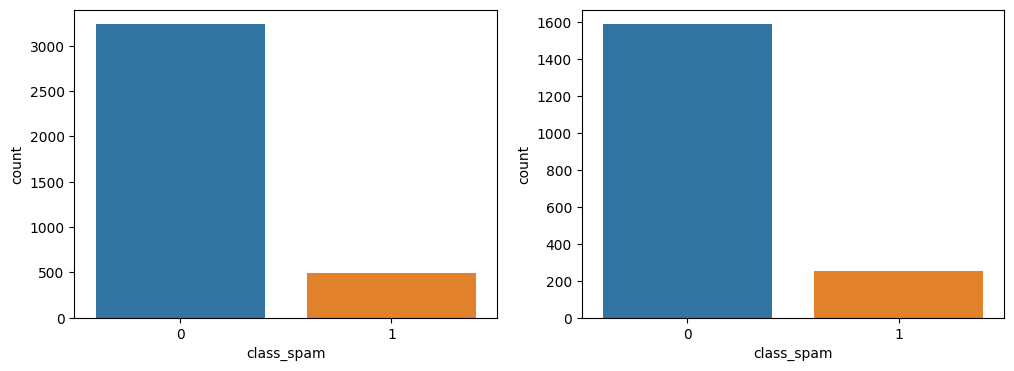

In [30]:
fig, ax = plt.subplots(1,2, figsize=(12,4))
sns.countplot(x=y_train, ax = ax[0])
sns.countplot(x=y_test, ax = ax[1])

## Naive bayes

In [31]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
def evaluate_model(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(cm, display_labels = ["Ham", "Spam"]).plot()

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1587
           1       1.00      0.75      0.86       252

    accuracy                           0.97      1839
   macro avg       0.98      0.88      0.92      1839
weighted avg       0.97      0.97      0.96      1839



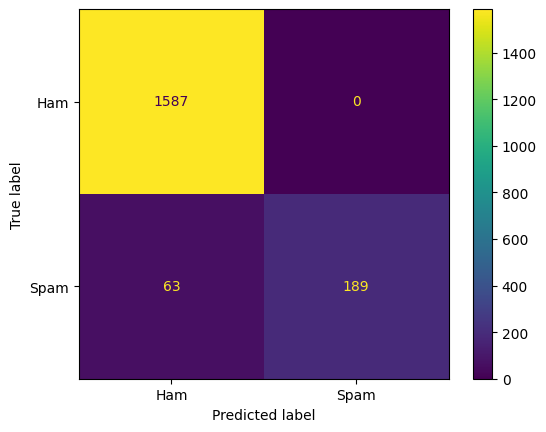

In [32]:
from sklearn.naive_bayes import MultinomialNB, ComplementNB, BernoulliNB

naive_bayes = dict(
    multinomial=MultinomialNB(), bernouilli=BernoulliNB(), complement=ComplementNB()
)

evaluate_model(naive_bayes["multinomial"])

# recall = TP/(TP+FN)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1587
           1       0.98      0.81      0.89       252

    accuracy                           0.97      1839
   macro avg       0.97      0.91      0.94      1839
weighted avg       0.97      0.97      0.97      1839



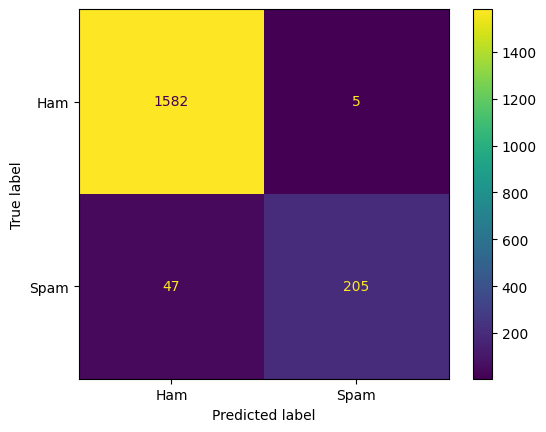

In [33]:
evaluate_model(naive_bayes["bernouilli"])

              precision    recall  f1-score   support

           0       0.99      0.92      0.96      1587
           1       0.66      0.94      0.78       252

    accuracy                           0.93      1839
   macro avg       0.83      0.93      0.87      1839
weighted avg       0.95      0.93      0.93      1839



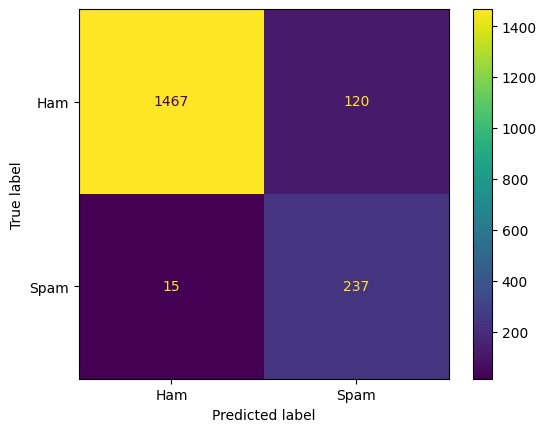

In [34]:
evaluate_model(naive_bayes["complement"])

## Some other models

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1587
           1       0.97      0.85      0.91       252

    accuracy                           0.98      1839
   macro avg       0.97      0.92      0.95      1839
weighted avg       0.98      0.98      0.98      1839



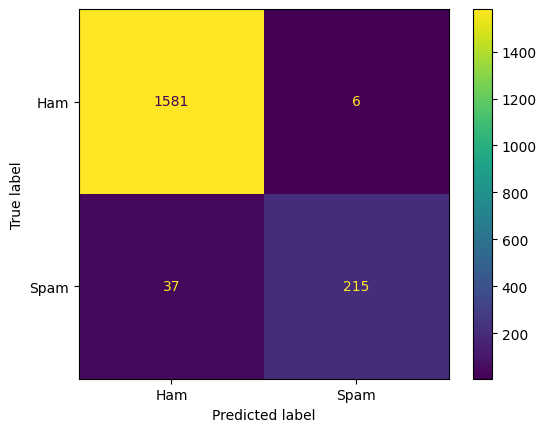

In [35]:
from sklearn.svm import LinearSVC

evaluate_model(LinearSVC())

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1587
           1       1.00      0.84      0.91       252

    accuracy                           0.98      1839
   macro avg       0.99      0.92      0.95      1839
weighted avg       0.98      0.98      0.98      1839



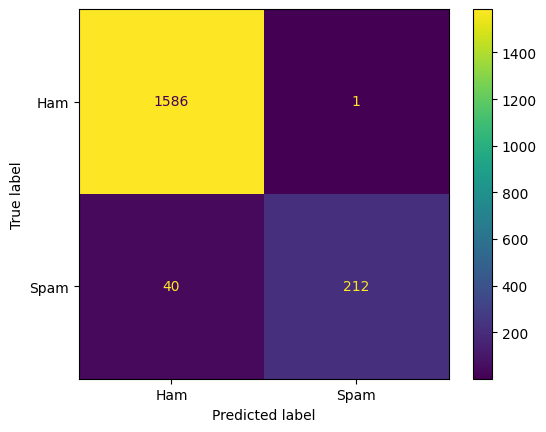

In [36]:
from sklearn.ensemble import RandomForestClassifier

evaluate_model(RandomForestClassifier())

## Combine different models

- majority vote
- class with most votes wins (hard voting)
- class with highest probability wins (soft voting)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1587
           1       1.00      0.86      0.92       252

    accuracy                           0.98      1839
   macro avg       0.99      0.93      0.96      1839
weighted avg       0.98      0.98      0.98      1839



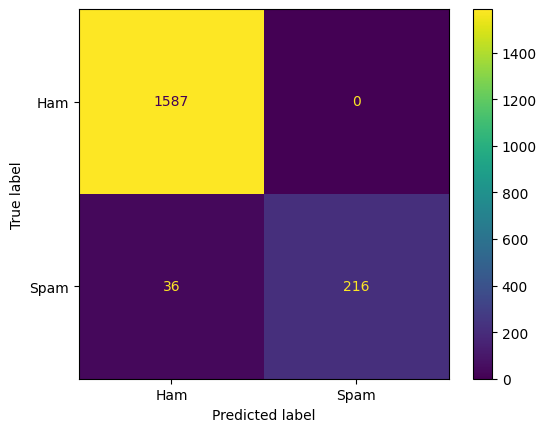

In [39]:
from sklearn.ensemble import VotingClassifier

vote_clf = VotingClassifier([
    ("random_forest", RandomForestClassifier()),
    ("svc", LinearSVC()),
    ("naive_complement", ComplementNB()),
    ("naive_multinomial", MultinomialNB()),
    ("naive_bernouilli", BernoulliNB())
], voting = "hard")

evaluate_model(vote_clf)

## Testing out a model - "deploy"

- assume we choose vote_clf

In [40]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([("tfidf", TfidfVectorizer(stop_words="english")), ("vote", vote_clf)])

# fits on all data
pipe.fit(X,y)
pipe.predict(["Come and collect your $1000 Bitcoins!"])

array([0], dtype=uint8)

In [41]:
pipe.predict(["You will win, $1000 for free"])

array([1], dtype=uint8)

In [42]:
pipe.predict(["love bitcoin"])

array([0], dtype=uint8)

In [43]:
pipe.predict(["You get €500"])

array([1], dtype=uint8)